In [40]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

#Libraries for data processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Libraries for decision tree and random forest model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#For performing hyperparameter tuning ( advanced code)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go

In [41]:
data=pd.read_csv("/Users/Zac/Downloads/data.csv")
data.head()

,SEQN,Age,Body_Mass_Index,Gender,Physical_Activity,Total_Caffeine,Food_Security,Count_Meds,Section_I,Section_H,Diabetes,Race_and_Ethnicity,Total_Sodium_Intake,Diastolic_Blood_Pressure,Systolic_Blood_Pressure
0,83732,62,27.8,1,0,360,2,9,0,0,1,3,3164,70,128
1,83733,53,30.8,1,0,192,2,1,0,0,2,4,982,88,146
2,83734,78,28.8,1,8,306,2,7,1,0,1,5,6260,46,138
3,83735,56,42.4,2,2,248,2,5,0,0,2,2,2402,72,132
4,83736,42,20.3,2,5,0,2,1,0,0,2,4,2532,70,100


In [44]:
gender = data.groupby(['Gender'])['Gender'].count()
gender

Gender
1    3465
2    3622
Name: Gender, dtype: int64

In [45]:
race=data.groupby(['Race_and_Ethnicity'])['Race_and_Ethnicity'].count()
race

Race_and_Ethnicity
0    5063
1     242
2     317
3     771
4     478
5     216
Name: Race_and_Ethnicity, dtype: int64

In [ ]:
ax = data[data['riagendr']==1].plot(x="ridageyr", y="BPXSY1", color="Red", label="Male", kind='scatter')
data[data['riagendr']==2].plot(x="ridageyr", y="BPXSY1", color="Cornflowerblue", label="Female", kind='scatter', ax=ax)
# Add title and axis names
plt.title('Blood Pressure across Age and Gender')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure(mmHg)')
fig.set_size_inches(25.5, 25.5)

In [ ]:
sns.boxplot(x='riagendr',y='BPXSY1',data=data,palette='rainbow')

In [49]:
df = data[data.Total_Sodium_Intake != 0]


/var/folders/tr/92x73hfj44ngl6mp4s96lqdh0000gp/T/ipykernel_1270/757751221.py:4: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



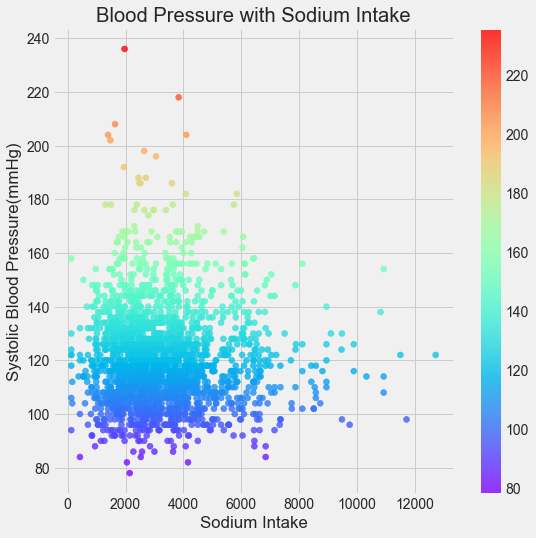

In [51]:
#Blood Presssure with Sodium Intake
plt.figure(figsize=(8,8))
plt.scatter(df.Total_Sodium_Intake, df.Systolic_Blood_Pressure, alpha = .8, c = df.Systolic_Blood_Pressure, cmap = 'rainbow')
cbar = plt.colorbar()

#go.Scatter(marker_colorscale=plotly.colors.sequential.Viridis)
plt.title('Blood Pressure with Sodium Intake')
plt.xlabel('Sodium Intake')
plt.ylabel('Systolic Blood Pressure(mmHg)')
plt.show()

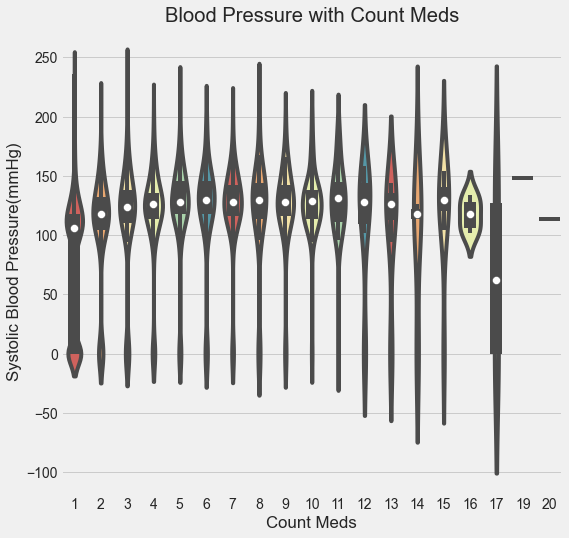

In [35]:
#Blood Pressure with Count Meds
plt.figure(figsize=(8,8))
sns.violinplot(x="count_meds", y="BPXSY1",data=data,palette=sns.color_palette("Spectral"))
plt.title('Blood Pressure with Count Meds')
plt.xlabel('Count Meds')
plt.ylabel('Systolic Blood Pressure(mmHg)')
plt.show()

In [68]:
df.groupby(['Gender'])['Total_Sodium_Intake'].mean()

Gender
1    3279.309744
2    3348.460439
Name: Total_Sodium_Intake, dtype: float64

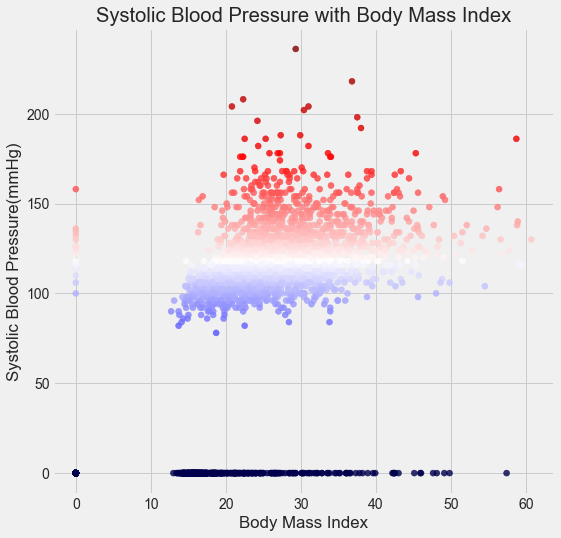

In [36]:
#Blood Pressure with body mass index
plt.figure(figsize=(8,8))
#sns.scatterplot(x="bmxbmi",y="BPXSY1",hue="BPXSY1",data=data,palette="rainbow")
plt.scatter(df.bmxbmi, df.BPXSY1, alpha = .8, c = df.BPXSY1, cmap = 'seismic')
plt.title('Systolic Blood Pressure with Body Mass Index')
plt.xlabel('Body Mass Index')
plt.ylabel('Systolic Blood Pressure(mmHg)')
plt.show()

<AxesSubplot:xlabel='ridreth1', ylabel='BPXSY1'>

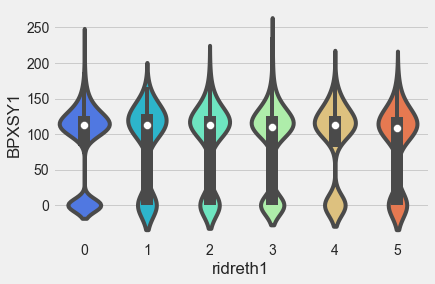

In [37]:
sns.violinplot(x="ridreth1", y="BPXSY1", data=data,palette='rainbow')

In [53]:
data['Sy_Label'] = pd.cut(x=data['Systolic_Blood_Pressure'],
                     bins=[0,140,250],
                     labels=['0', '1'])
data['Dy_Label']= pd.cut(x=data['Diastolic_Blood_Pressure'],
                     bins=[0,90,250],
                     labels=['0', '1'])

In [54]:
class_list = []
for sys, dia in zip(data["Sy_Label"], data["Dy_Label"]):
    if int(sys) + int(dia) > 0:
        class_list.append(1)
    else:
        class_list.append(0)

In [55]:
data["target"]=class_list

In [7]:
data["target"]

0       0
1       1
2       0
3       0
4       0
       ..
7082    0
7083    1
7084    0
7085    0
7086    0
Name: target, Length: 7087, dtype: int64

In [113]:
data[["Sy_Label", "Dy_Label", "target"]]

,Sy_Label,Dy_Label,target
0,0,0,0
1,1,0,1
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
7082,0,0,0
7083,1,0,1
7084,0,0,0
7085,0,0,0


<AxesSubplot:>

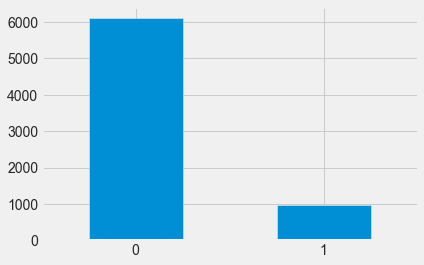

In [89]:
#Imbalanced data
data["target"].value_counts().plot(kind='bar', rot=0)

In [56]:
#Creating list for extracting categorical variables 
#We will use this list to perform label encoding

categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")

In [57]:
#Converting Attrition variable to 0 and 1
data["target"]=data['target'].astype("category").cat.codes

In [58]:
#Performing label encoding and Tranforming categorical data

label = LabelEncoder()
for column in categorical_col:
    data[column] = label.fit_transform(data[column])

In [117]:
data.head()

,SEQN,Age,Body_Mass_Index,Gender,Physical_Activity,Total_Caffeine,Food_Security,Count_Meds,Section_I,Section_H,Diabetes,Race_and_Ethnicity,Total_Sodium_Intake,Diastolic_Blood_Pressure,Systolic_Blood_Pressure,Sy_Label,Dy_Label,target
0,83732,62,27.8,1,0,360,2,9,0,0,1,3,3164,70,128,0,0,0
1,83733,53,30.8,1,0,192,2,1,0,0,2,4,982,88,146,1,0,1
2,83734,78,28.8,1,8,306,2,7,1,0,1,5,6260,46,138,0,0,0
3,83735,56,42.4,2,2,248,2,5,0,0,2,2,2402,72,132,0,0,0
4,83736,42,20.3,2,5,0,2,1,0,0,2,4,2532,70,100,0,0,0


In [118]:
data.count()

SEQN                        7087
Age                         7087
 Body_Mass_Index            7087
Gender                      7087
Physical_Activity           7087
Total_Caffeine              7087
Food_Security               7087
Count_Meds                  7087
Section_I                   7087
Section_H                   7087
Diabetes                    7087
Race_and_Ethnicity          7087
Total_Sodium_Intake         7087
Diastolic_Blood_Pressure    7087
Systolic_Blood_Pressure     7087
Sy_Label                    7087
Dy_Label                    7087
target                      7087
dtype: int64

In [77]:
#Seperating dependent and independent variable
X = data.drop(['target',"SEQN","Dy_Label","Sy_Label",'Diastolic_Blood_Pressure','Systolic_Blood_Pressure'], axis=1)
y = data["target"]

#Splitting the data
#Random_state=42 is used to get the same output the first time you make the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:

from sklearn.ensemble import RandomForestClassifier

#initializing the model
 
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
# Train the mode
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=500, random_state=1)

In [79]:

#obtaing feature importance from the model
importances = forest.feature_importances_

# Sort the feature importance in descending order

sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 32,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Age                              0.260875
 2)  Body_Mass_Index                 0.210982
 3) Total_Caffeine                   0.167102
 4) Count_Meds                       0.090722
 5) Physical_Activity                0.067646
 6) Total_Sodium_Intake              0.057452
 7) Race_and_Ethnicity               0.033905
 8) Section_I                        0.033596
 9) Diabetes                         0.030853
10) Gender                           0.029622
11) Food_Security                    0.013713
12) Section_H                        0.003532


In [134]:
X_train.columns

Index(['Age ', ' Body_Mass_Index', 'Gender', 'Physical_Activity',
       'Total_Caffeine', 'Food_Security', 'Count_Meds', 'Section_I',
       'Section_H', 'Diabetes', 'Race_and_Ethnicity', 'Total_Sodium_Intake'],
      dtype='object')

In [60]:
#Fitting the random forest model using RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
#Tuning the hyper parameters  using Random Search and Grid Search Cross Validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


rf_clf = RandomForestClassifier(n_estimators=100)
rf_cv = GridSearchCV(rf_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=8)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best paramters: {best_params})")

rf_clf =RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

Fitting 8 folds for each of 1083 candidates, totalling 8664 fits
Best paramters: {'max_depth': 9, 'min_samples_leaf': 13, 'min_samples_split': 2})


RandomForestClassifier(max_depth=9, min_samples_leaf=13)

In [62]:
#Evaluating random forest model using the previously created function
#Creating a function to print evaluation metrics

def print_score(clf, X_train, y_train, X_test, y_test, train=True, pos_label="Yes"):
    if train == False:
        pred = clf.predict(X_test)
        print("Test Result:\n")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8627174424071462

Classification Report: 
 	Precision: 0.5714285714285714
	Recall Score: 0.027210884353741496
	F1 score: 0.051948051948051945

Confusion Matrix: 
 [[1827    6]
 [ 286    8]]



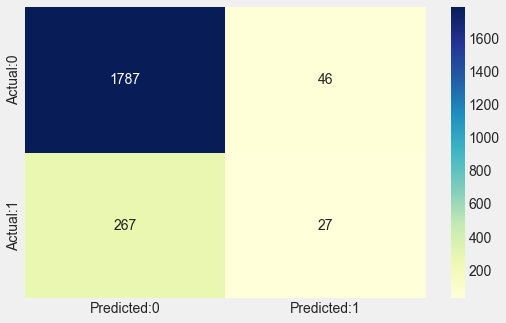

In [19]:
#Creating Confusion Matrix to evaluate the model
pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [63]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test,pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)



Specificity: 0.9967266775777414
Sensitivity: 0.027210884353741496


In [140]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test,pred)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted:0','Predicted:1'],
            index=['Actual:0','Actual:1'])
# Showing the confusion matrix
cm_df


,Predicted:0,Predicted:1
Actual:0,1784,49
Actual:1,261,33


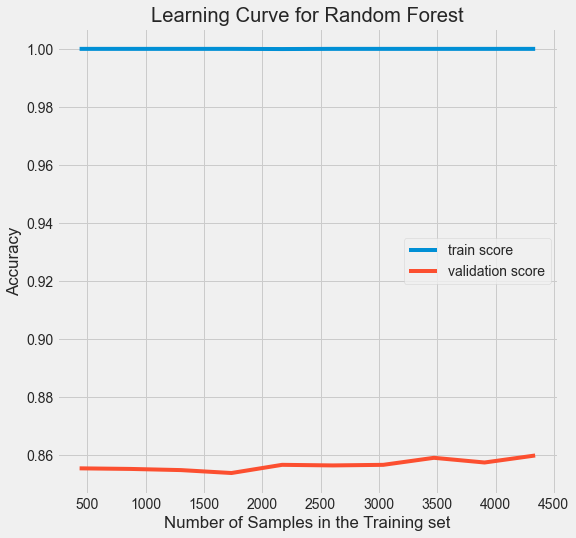

In [103]:
#Building the Learning Curve
from sklearn.model_selection import learning_curve
N, train_score, test_score = learning_curve(rf_clf, X_train, y_train, 
                                               cv=8, scoring='accuracy', 
                                               train_sizes=np.linspace(0.1,1,10))
plt.figure(figsize=(8,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, test_score.mean(axis=1), label='validation score')
plt.title('Learning Curve for Random Forest')
plt.xlabel('Number of Samples in the Training set')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
#Checking the class balance
Response = pd.DataFrame()
Response['target'] = data['target']

In [28]:
#count of class
class_0, class_1 = data['target'].value_counts()

# Divide by class
df_class_0 = data[Response["target"] == 0]
df_class_1 = data[Response['target'] == 1]

print(class_0)
print(class_1)

6109
978


In [29]:
#Performing Under sampling
df_class_0_under = df_class_0.sample(class_1,random_state=42)
new_df = pd.concat([df_class_0_under, df_class_1], axis=0)

Random under-sampling:
0    978
1    978
Name: target, dtype: int64


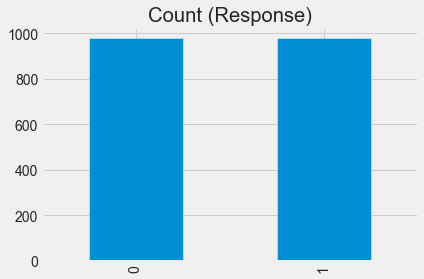

In [30]:
#plotting our resampled data by class
print('Random under-sampling:')
results=new_df['target'].value_counts()
print(results)

new_df['target'].value_counts().plot(kind='bar', title='Count (Response)');

In [31]:
#Seperating dependent and independent variable
X = data.drop(['target',"SEQN","Dy_Label","Sy_Label",'Diastolic_Blood_Pressure','Systolic_Blood_Pressure'], axis=1)
y = data["target"]

#Splitting the data
#Random_state=42 is used to get the same output the first time you make the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
#Fitting the random forest model using RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
#Tuning the hyper parameters to increase accuracy for the model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Creating a list of parameters and Choosing best ones 
params = {
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


rf_clf = RandomForestClassifier(n_estimators=100)
rf_cv = GridSearchCV(rf_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=8)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best paramters: {best_params})")

rf_clf =RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

Fitting 8 folds for each of 1083 candidates, totalling 8664 fits
Best paramters: {'max_depth': 9, 'min_samples_leaf': 9, 'min_samples_split': 3})


RandomForestClassifier(max_depth=9, min_samples_leaf=9, min_samples_split=3)

In [34]:
#Evaluating random forest model using the previously created function
#Creating a function to print evaluation metrics

def print_score(clf, X_train, y_train, X_test, y_test, train=True, pos_label="Yes"):
    if train == False:
        pred = clf.predict(X_test)
        print("Test Result:\n")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8631875881523272

Classification Report: 
 	Precision: 0.5652173913043478
	Recall Score: 0.04421768707482993
	F1 score: 0.08201892744479494

Confusion Matrix: 
 [[1823   10]
 [ 281   13]]



In [36]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test,pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)


Specificity: 0.994544462629569
Sensitivity: 0.04421768707482993


In [ ]:
#Creating Confusion Matrix to evaluate the model
pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

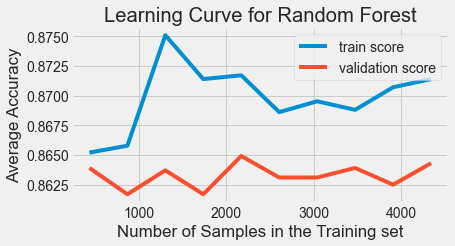

In [67]:
#Building the learning curve for balanced data
from sklearn.model_selection import learning_curve
N, train_score, test_score = learning_curve(rf_clf, X_train, y_train, 
                                               cv=8, scoring='accuracy', 
                                               train_sizes=np.linspace(0.1,1,10))
plt.figure(figsize=(6,3))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, test_score.mean(axis=1), label='validation score')
plt.title('Learning Curve for Random Forest')
plt.xlabel('Number of Samples in the Training set')
plt.ylabel('Average Accuracy')
plt.legend(loc='upper right')
plt.show()

In [69]:
#Obtaining feature importance for balanced data

from sklearn.ensemble import RandomForestClassifier

#initializing the model
 
forest = RandomForestClassifier(n_estimators=100,
                                random_state=1)
# Train the mode
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=1)

In [70]:

#obtaing feature importance from the model
importances = forest.feature_importances_

# Sort the feature importance in descending order

sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 32,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Age                              0.261645
 2)  Body_Mass_Index                 0.211293
 3) Total_Caffeine                   0.169417
 4) Count_Meds                       0.088573
 5) Physical_Activity                0.067440
 6) Total_Sodium_Intake              0.055724
 7) Section_I                        0.033478
 8) Race_and_Ethnicity               0.033341
 9) Diabetes                         0.032519
10) Gender                           0.029552
11) Food_Security                    0.013479
12) Section_H                        0.003539


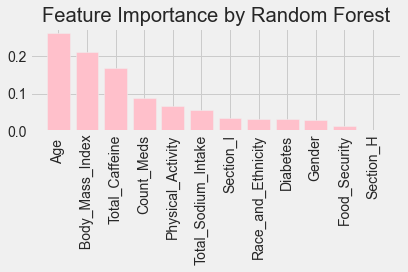

In [76]:
#Plotting
import matplotlib.pyplot as plt
#plt.figure(figsize=(8,8)) 
plt.title('Feature Importance by Random Forest')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center', color='pink')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation='vertical')
plt.tight_layout()
plt.show()